In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-additional.csv',sep=';')


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.rename(columns={'y':'deposit'},inplace=True)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [7]:
data.shape

(4119, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
(data['marital']).value_counts()

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

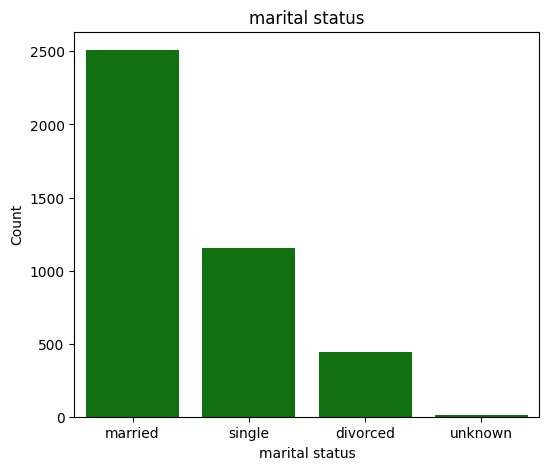

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(x='marital' , data=data, color='g')
plt.xlabel('marital status')
plt.ylabel('Count')
plt.title('marital status')
plt.show()

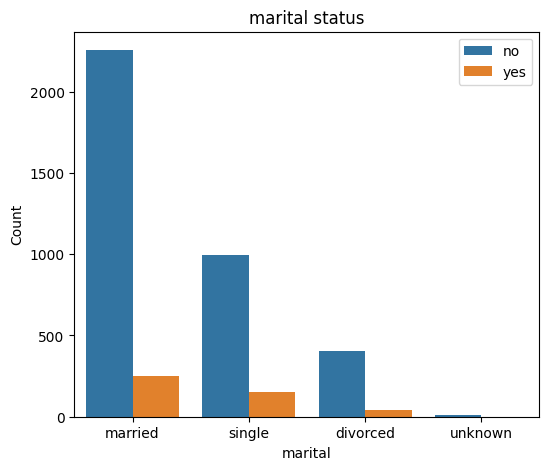

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(data, x='marital', hue="deposit")
# plt.xlabel('marital status')
plt.ylabel('Count')
plt.title('marital status')
plt.legend()
plt.show()

In [14]:
data['age'].value_counts()

age
32    216
31    191
30    177
34    174
35    172
     ... 
69      2
70      2
85      1
88      1
19      1
Name: count, Length: 67, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

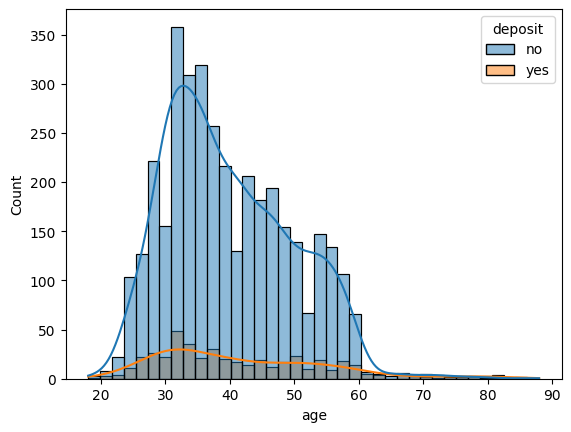

In [15]:
sns.histplot(data, x='age', hue='deposit', kde=True)


In [16]:
cat_col = [col for col in data.columns if data[col].dtype=='object']
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'deposit']

In [17]:
num_col = [col for col in data.columns if data[col].dtype!='object']
num_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

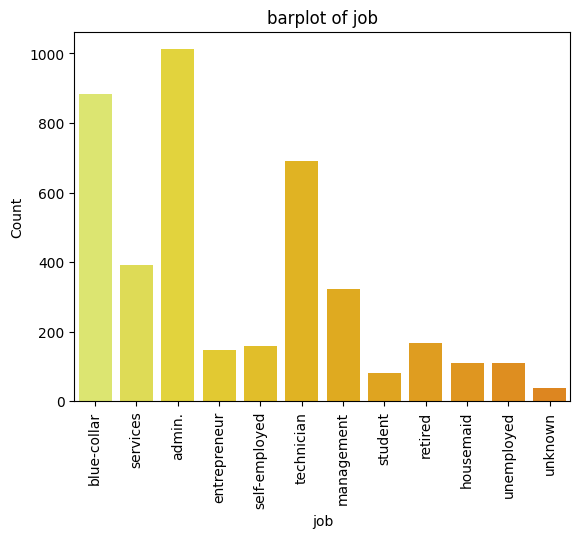

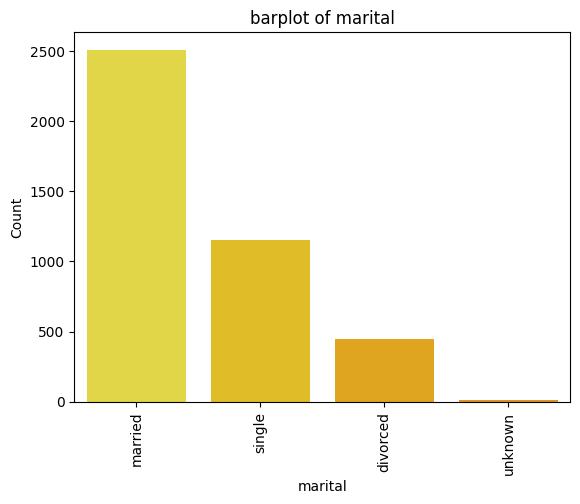

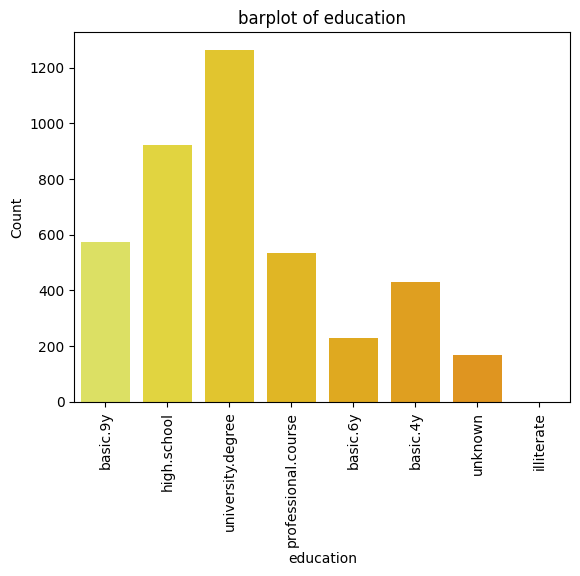

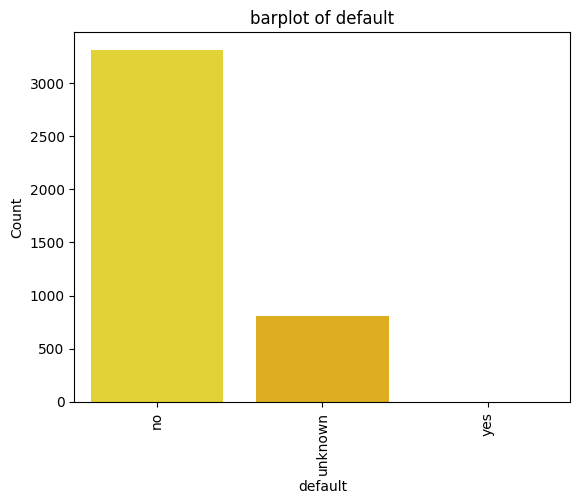

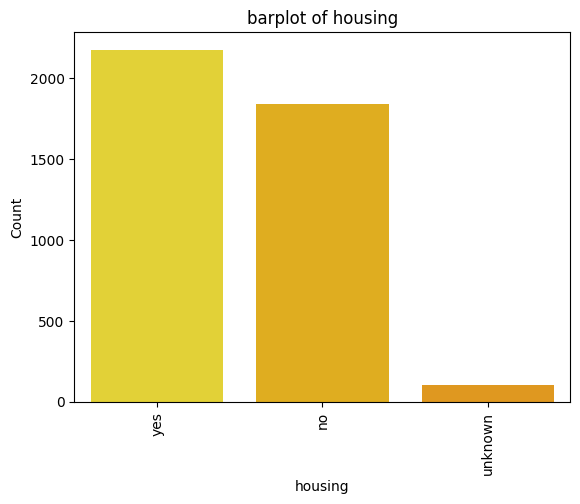

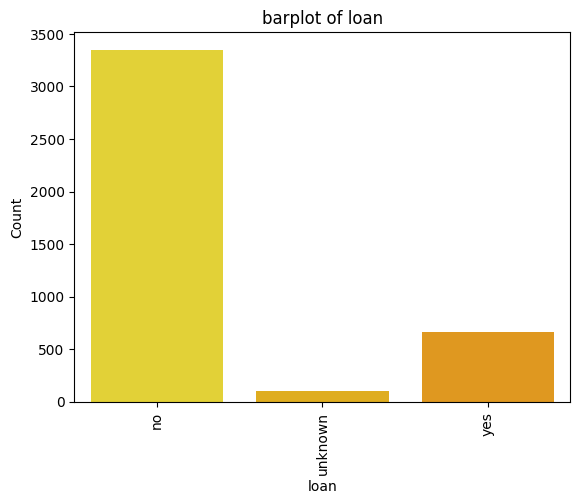

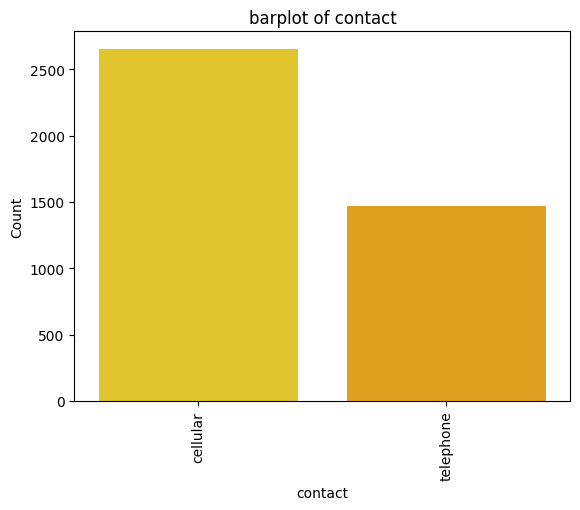

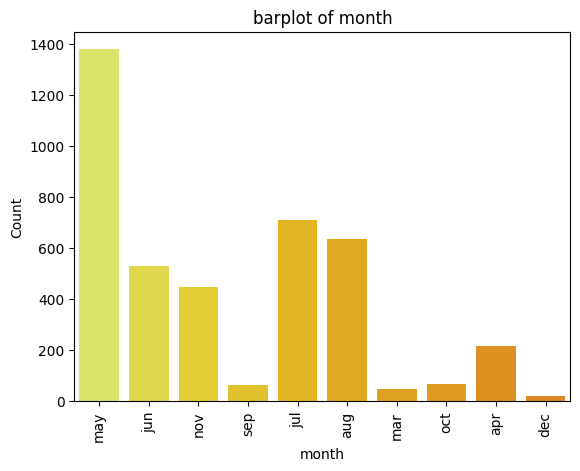

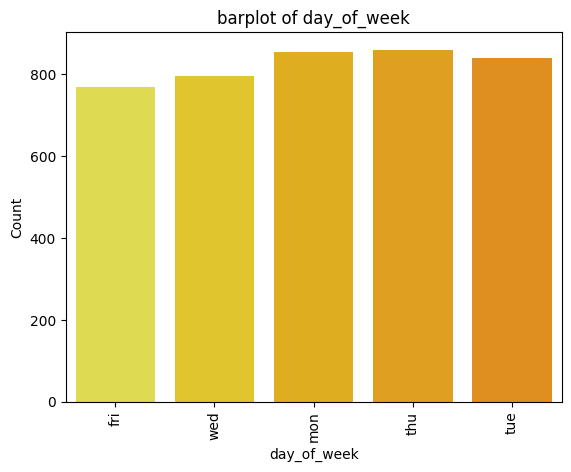

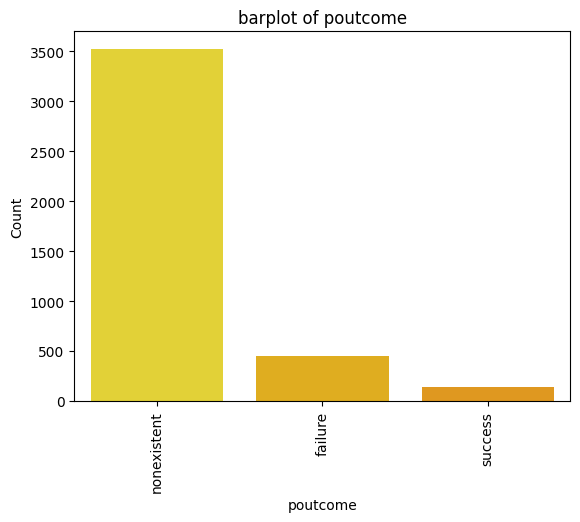

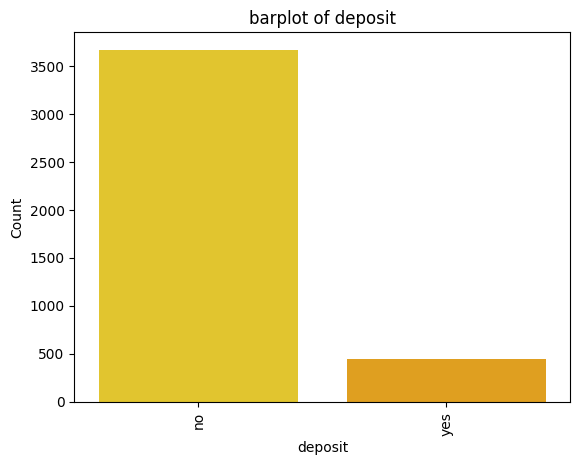

In [18]:
for feature in cat_col:
  sns.countplot(data, x = feature, palette='Wistia' )
  plt.title(f"barplot of {feature}")
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.041299 -0.014169 -0.043425  0.050931   
duration        0.041299  1.000000 -0.085348 -0.046998  0.025724   
campaign       -0.014169 -0.085348  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.046998  0.058742  1.000000 -0.587941   
previous        0.050931  0.025724 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.028848  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482  0.016672  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135 -0.034745  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.032329  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.044218  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.028848        0.016672      -0.034745  -0.032329   
campaign            0.176079 

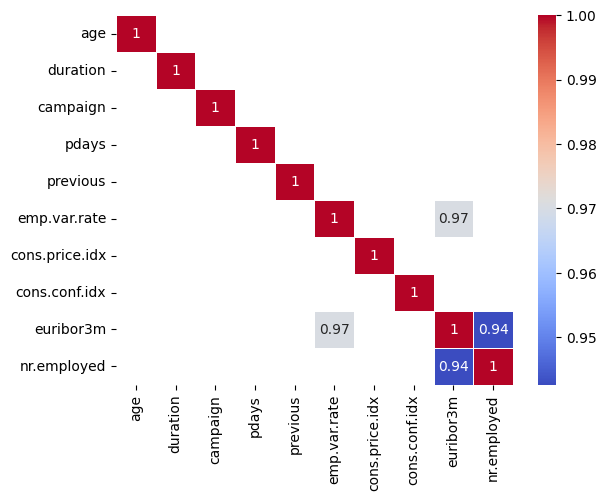

In [19]:
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

In [20]:
high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']

In [21]:
high_corr_cols

['emp.var.rate', 'euribor3m', 'nr.employed']

In [22]:
data1 = data.copy()
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [23]:
data1.drop(high_corr_cols, inplace=True,axis=1)
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [24]:
data1.shape

(4119, 18)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = data1.apply(le.fit_transform)
data_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,510,0,20,0,1,13,17,0


In [26]:
data_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

In [27]:
x = data_encoded.drop('deposit', axis=1)
y = data_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [28]:
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def eval_model(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  print('Accuracy_Score', acc)
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix\n', cm)
  print('Classification Report\n', classification_report(y_test, y_pred))

In [31]:
def mscore(model):
  train_score = model.score(x_train, y_train)
  test_score = model.score(x_test, y_test)
  print(f'Train Score: {train_score}')
  print(f'Testing Score: {test_score}')

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [33]:
mscore(dt)

Train Score: 0.923276141146002
Testing Score: 0.9116504854368932


In [34]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 0 0]


In [35]:
eval_model(y_test, ypred_dt)

Accuracy_Score 0.9116504854368932
Confusion Matrix
 [[913  17]
 [ 74  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.60      0.26      0.36       100

    accuracy                           0.91      1030
   macro avg       0.76      0.62      0.66      1030
weighted avg       0.89      0.91      0.90      1030



In [45]:
from sklearn.tree import plot_tree
Tree = True
cn = ['no', 'yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


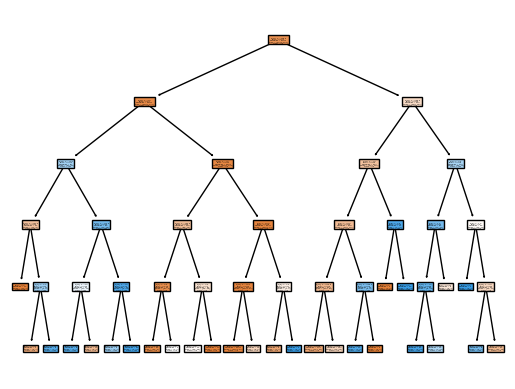

In [46]:
plot_tree(dt,class_names=cn, filled=Tree)
plt.show()

In [47]:
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [48]:
mscore(dt1)

Train Score: 0.9145354483651668
Testing Score: 0.916504854368932


In [49]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test, ypred_dt1)

Accuracy_Score 0.916504854368932
Confusion Matrix
 [[912  18]
 [ 68  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.64      0.32      0.43       100

    accuracy                           0.92      1030
   macro avg       0.79      0.65      0.69      1030
weighted avg       0.90      0.92      0.90      1030



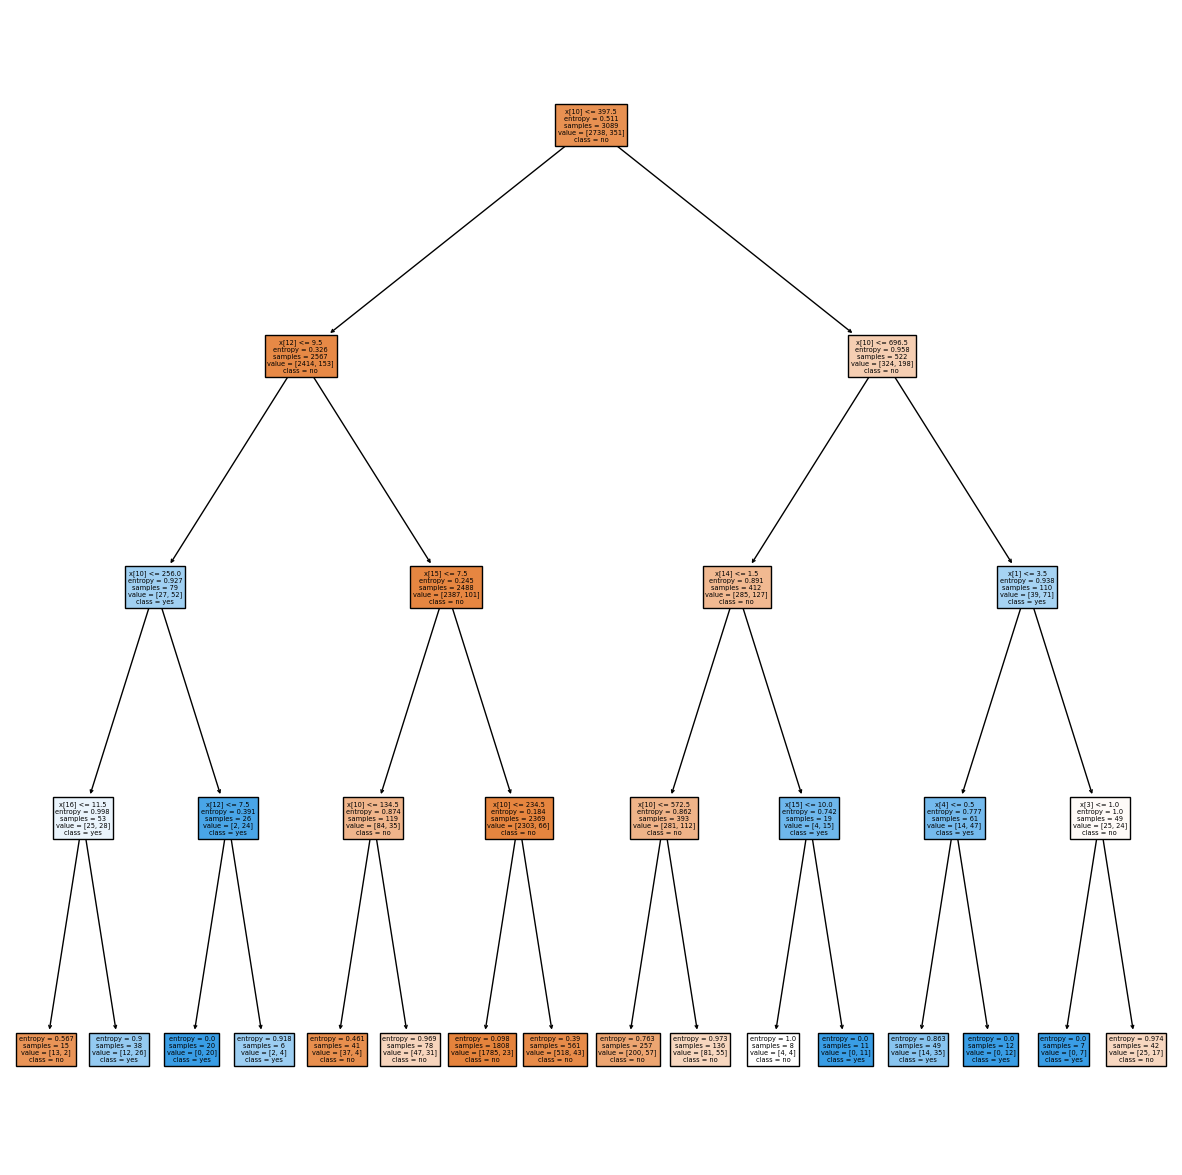

In [51]:
plt.figure(figsize=(15,15))
plot_tree(dt1, class_names=cn, filled=Tree)
plt.show()